In [1]:
# importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression
from scipy.stats import pearsonr

# HOUSE PRICE DISTRIBUTION

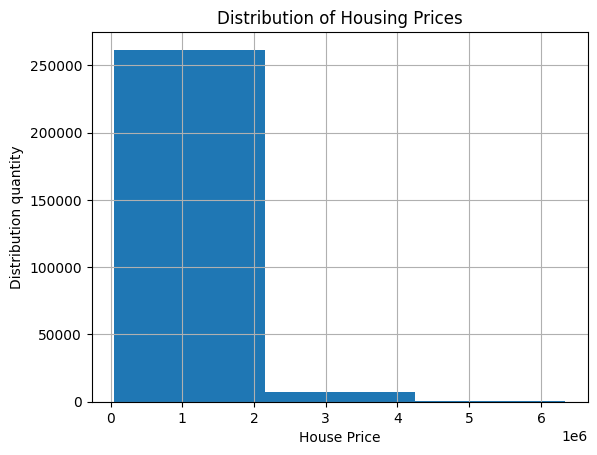

In [2]:
offences_with_house_price = pd.read_csv('matched_offences_with_house_price.csv')

# Plot the distribution of House Prices
offences_with_house_price['House Price'].hist(bins=3)

plt.title('Distribution of Housing Prices')
plt.xlabel('House Price')
plt.ylabel('Distribution quantity')
plt.grid(True)
plt.show()

# Research narrow down

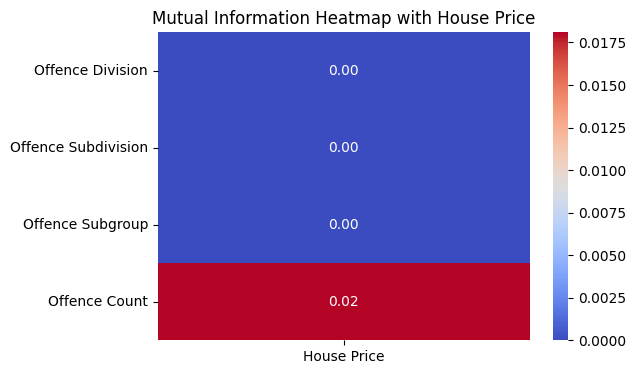

In [3]:
# read file
df = pd.read_csv('encode_offence_with_house_price.csv')

# select columns
data = df[['Offence Division','Offence Subdivision','Offence Subgroup', 'Offence Count', 'House Price']]

# calculate mutual information
X = data[['Offence Division','Offence Subdivision','Offence Subgroup', 'Offence Count']]  # dependent variable
y = data['House Price']  # target variable

# use the mutual information regression
mi = mutual_info_regression(X, y)

# create a MI matrix
mi_matrix = pd.DataFrame(mi, index=['Offence Division','Offence Subdivision','Offence Subgroup', 'Offence Count'], columns=['House Price'])

# plot the diagram
plt.figure(figsize=(6, 4))
sns.heatmap(mi_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mutual Information Heatmap with House Price')
plt.show()

# Sort by year

In [4]:
# read csv
file_name = "matched_offences_with_house_price.csv"
offenced_with_house_price = pd.read_csv(file_name)

In [5]:
# get the average value of house price and offense count for each region
grouped_by_region = offenced_with_house_price.groupby(['Year', 'Local Government Area']).agg({
    'Offence Count': 'sum',
    'House Price': 'mean'
}).reset_index()

In [6]:
plt.figure(figsize=(15,6))

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

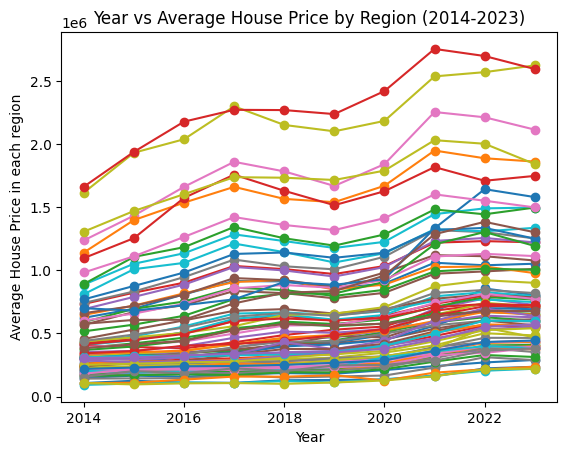

In [7]:
# plot the data by region with house price
for region in grouped_by_region['Local Government Area'].unique():
    region_data = grouped_by_region[grouped_by_region['Local Government Area'] == region]
    plt.plot(region_data['Year'], region_data['House Price'], marker='o', linestyle='-', label=region)

plt.title('Year vs Average House Price by Region (2014-2023)')
plt.xlabel('Year')
plt.ylabel('Average House Price in each region')
plt.show()

In [8]:
plt.figure(figsize=(15,6))

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

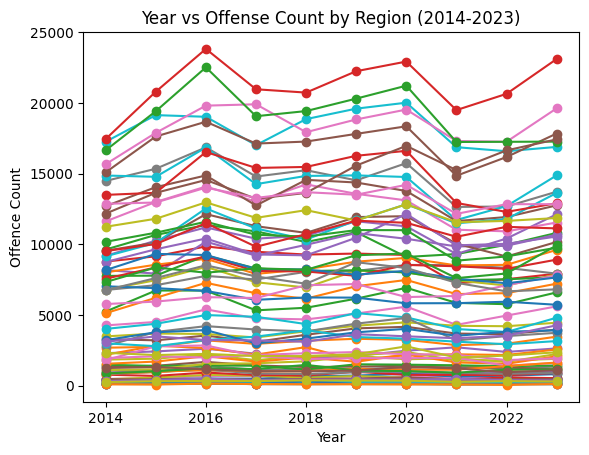

In [9]:
# plot the data by region with offence count
for region in grouped_by_region['Local Government Area'].unique():
    region_data = grouped_by_region[grouped_by_region['Local Government Area'] == region]
    plt.plot(region_data['Year'], region_data['Offence Count'], marker='o', linestyle='-', label=region)

plt.title('Year vs Offense Count by Region (2014-2023)')
plt.xlabel('Year')
plt.ylabel('Offence Count')
plt.show()

# Sort by region(all the regions)

### Bar AND Line chart
-> compare offense count in different regions

In [10]:
# Calculate the average house price and total number of crimes in each local government area
area_summary = offenced_with_house_price.groupby('Local Government Area').agg({
    'House Price': 'mean',
    'Offence Count': 'sum'
})

# choose the top 10 areas that have the highest housing price
top_10_areas = area_summary.sort_values(by='House Price', ascending=False).head(10)

top_10_areas

,House Price,Offence Count
Local Government Area,,
Stonnington,2.310566e+06,107634
Boroondara,2.215148e+06,75444
Bayside,1.806885e+06,49148
Port Phillip,1.725838e+06,119858
Glen Eira,1.622736e+06,66033
Melbourne,1.576174e+06,83170
Yarra,1.352806e+06,132307
Whitehorse,1.272131e+06,84190
Manningham,1.239238e+06,45163


C:\Users\16123\AppData\Local\Temp\ipykernel_12956\2256491836.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top_10_areas.index, rotation=40, ha='right')


<Figure size 640x480 with 0 Axes>

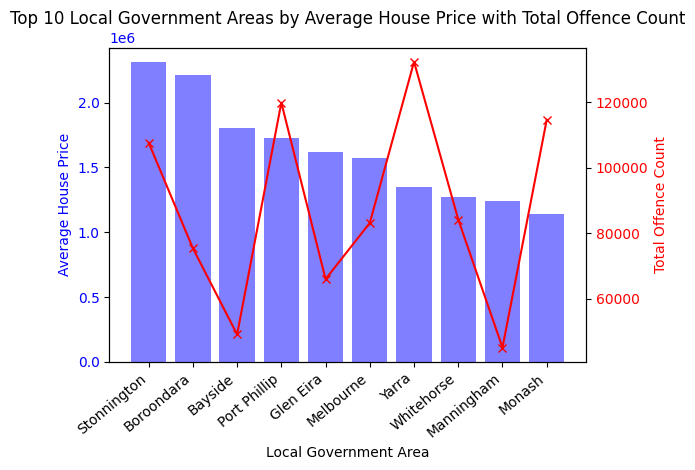

In [11]:
# draw the chart
plt.figure()

# We need to put two charts in one window--there are three columns of data that I want to represent--so we need to draw subplots
fig, ax1 = plt.subplots()

# bar chart -> house prices
ax1.set_xlabel('Local Government Area')
ax1.set_ylabel('Average House Price', color='blue')
ax1.bar(top_10_areas.index, top_10_areas['House Price'], color='blue', alpha=0.5, label='Average House Price')
ax1.tick_params(axis='y', labelcolor='blue')

# x label rotate
ax1.set_xticklabels(top_10_areas.index, rotation=40, ha='right')

# line chart -> offense count
ax2 = ax1.twinx()
ax2.set_ylabel('Total Offence Count', color='red')
ax2.plot(top_10_areas.index, top_10_areas['Offence Count'], color='red', marker='x', label='Total Offence Count')
ax2.tick_params(axis='y', labelcolor='red')

# format
plt.title('Top 10 Local Government Areas by Average House Price with Total Offence Count')
fig.tight_layout()
plt.show()

Calculate the average house price and total number of crimes for each local government area, then create a bar and line chart combination to display information for the top 10 districts

# By LGA, Police Region and Suburb

### - LGA

In [12]:
# read csv
file_name = "offence_and_housePrice_by_LGA.csv"
data_lga = pd.read_csv(file_name)

In [13]:
# take the average house price and offence count by region in 2014~2023
average_data_lga = data_lga.groupby('Local Government Area').agg({
    'House Price': 'mean',
    'Offence Count': 'mean'
}).reset_index()

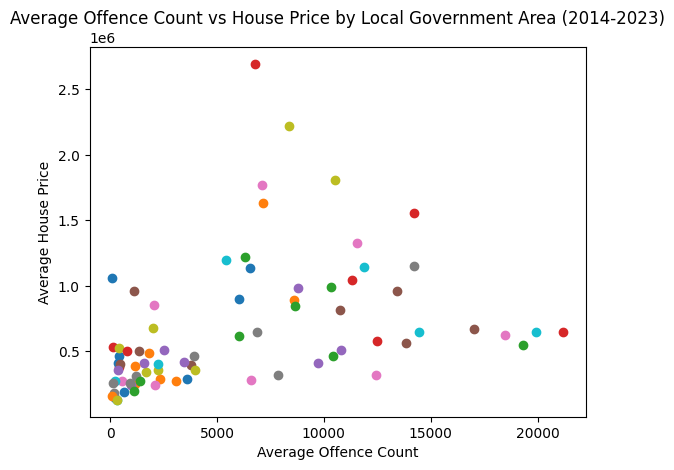

In [14]:
# plot figure for LGA
plt.figure()

for area in average_data_lga['Local Government Area']:
    subset = average_data_lga[average_data_lga['Local Government Area'] == area]
    plt.scatter(subset['Offence Count'], subset['House Price'], label=area)

plt.title('Average Offence Count vs House Price by Local Government Area (2014-2023)')
plt.xlabel('Average Offence Count')
plt.ylabel('Average House Price')
plt.show()

In [15]:
pearson_corr, _= pearsonr(average_data_lga["Offence Count"], average_data_lga["House Price"])
pearson_corr

np.float64(0.39537978219918146)

### - Police Region

In [16]:
# read csv
file_name = "offence_and_housePrice_by_police_region.csv"
data_policeRegion = pd.read_csv(file_name)

In [17]:
# take the average house price and offence count by region in 2014~2023
average_data_region = data_policeRegion.groupby('Police Region').agg({
    'House Price': 'mean',
    'Offence Count': 'mean'
}).reset_index()

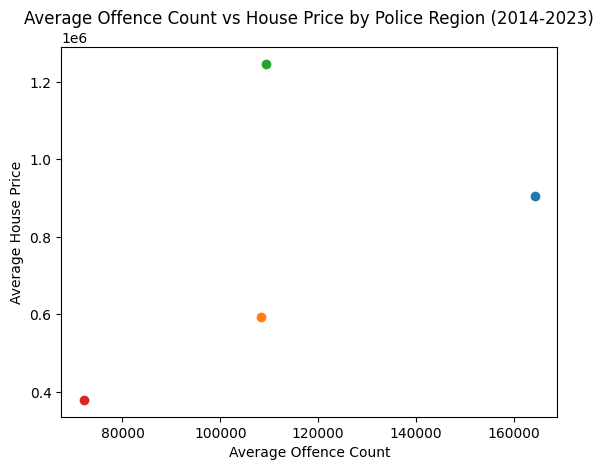

In [18]:
# plot figure for Police Region
plt.figure()

for region in average_data_region['Police Region']:
    subset = average_data_region[average_data_region['Police Region'] == region]
    plt.scatter(subset['Offence Count'], subset['House Price'], label=region)

plt.title('Average Offence Count vs House Price by Police Region (2014-2023)')
plt.xlabel('Average Offence Count')
plt.ylabel('Average House Price')
plt.show()

In [19]:
pearson_corr, _= pearsonr(average_data_region["Offence Count"], average_data_region["House Price"])
pearson_corr

np.float64(0.5114119111625409)

### - Suburb

In [20]:
# read csv
file_name = "offence_and_housePrice_by_suburb.csv"
data_suburb = pd.read_csv(file_name)

In [21]:
# take the average house price and offence count by region in 2014~2023
average_data_suburb = data_suburb.groupby('Suburb/Town Name').agg({
    'House Price': 'mean',
    'Offence Count': 'mean'
}).reset_index()

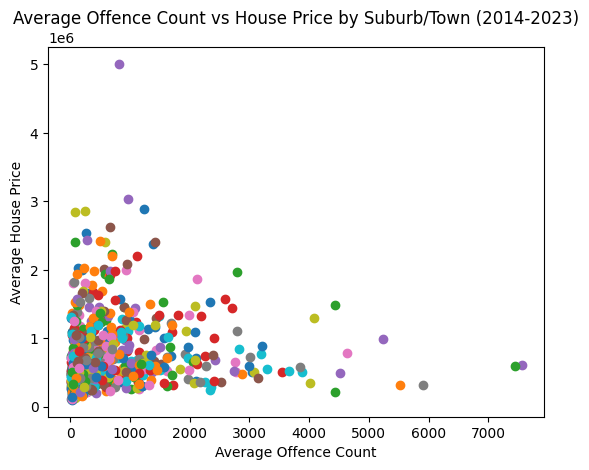

In [22]:
# plot figure for Suburb
plt.figure()

for suburb in average_data_suburb['Suburb/Town Name']:
    subset = average_data_suburb[average_data_suburb['Suburb/Town Name'] == suburb]
    plt.scatter(subset['Offence Count'], subset['House Price'], label=suburb)

plt.title('Average Offence Count vs House Price by Suburb/Town (2014-2023)')
plt.xlabel('Average Offence Count')
plt.ylabel('Average House Price')
plt.show()

In [23]:
pearson_corr, _= pearsonr(average_data_suburb["Offence Count"], average_data_suburb["House Price"])
pearson_corr

np.float64(0.09304667004617598)